In [25]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import os
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import re

In [2]:
empresas = pd.read_csv('empresas_v2.csv')
infos = pd.read_csv('infos_empresas.csv')
cotacoes = pd.read_csv('cotacoes.csv')
dividendos = pd.read_csv('dividendos.csv')
indicadores = pd.read_csv('indicadores.csv')

empresas = empresas.drop(empresas.columns[0], axis=1)
infos = infos.drop(infos.columns[0], axis=1)
cotacoes = cotacoes.drop(cotacoes.columns[0], axis=1)
dividendos = dividendos.drop(dividendos.columns[0], axis=1)
indicadores = indicadores.drop(indicadores.columns[0], axis=1)

In [3]:
anos = np.arange(2015,2024)
hoje = datetime.now()
um_ano_atras = hoje - timedelta(days=365)
anos

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [4]:
indicadores

,ticker,cvm_code,setor,estatal,year,roe,debt_ratio,vpa,lpa,dividendo
0,CMIG4,2453,energia,True,2015,0.190104,4.785397,5.899813,1.121575,1.219627
1,CMIG4,2453,energia,True,2016,0.025881,39.342204,5.875599,0.152066,1.293778
2,CMIG4,2453,energia,True,2017,0.069894,12.289442,6.509642,0.454987,0.487119
3,CMIG4,2453,energia,True,2018,0.109271,7.565812,7.240637,0.791195,1.288606
4,CMIG4,2453,energia,True,2019,0.198376,4.226188,7.314763,1.451075,1.450221
...,...,...,...,...,...,...,...,...,...,...
251,TIMS3,24929,telecom,False,2018,0.079137,-1.500065,8.005929,0.633563,0.236894
252,TIMS3,24929,telecom,False,2019,NaN,-inf,0.000000,0.000000,0.465888
253,TIMS3,24929,telecom,False,2020,0.079529,-1.247876,9.576464,0.761602,0.549765
254,TIMS3,24929,telecom,False,2021,NaN,inf,0.000000,0.000000,0.432831


In [5]:
cotacao_list = []
min_52_list = []
max_52_list = []
for ticker in empresas.empresa:
    ticker = ticker + '.SA'

    acao = yf.Ticker(ticker)

    try:
        cotação_atualizada = acao.history(period="1d")["Close"].iloc[-1]
    except:
        cotação_atualizada = 0

    cotacoes_acao = yf.download(ticker, um_ano_atras, hoje)
    min_52_w = cotacoes_acao['Low'].min()
    max_52_w = cotacoes_acao['High'].max()

    cotacao_list.append(cotação_atualizada)
    min_52_list.append(min_52_w)
    max_52_list.append(max_52_w)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
BRSR5.SA: No price data found, symbol may be delisted (period=1d)
[*********************100%%**********

In [6]:
empresas['cotacao'] = cotacao_list
empresas['max_52_weeks'] = max_52_list
empresas['min_52_weeks'] = min_52_list

In [7]:
empresas

,empresa,setor,codigo_cvm,estatal,acoes_on,acoes_pn,acoes_total,equivalencia_unit,equivalencia_ticker,equivalencia_valor,cotacao,max_52_weeks,min_52_weeks
0,CMIG4,energia,2453,True,735847624,1465523064,2201370688,1,CMIG4,1.000000,13.070000,13.630000,10.480000
1,CMIG3,energia,2453,True,735847624,1465523064,2201370688,1,CMIG4,0.924145,15.090000,21.100000,13.100000
2,TAEE11,energia,20257,False,590714069,442782652,1033496721,3,TAEE11,1.000000,36.400002,38.619999,33.240002
3,TAEE3,energia,20257,False,590714069,442782652,1033496721,1,TAEE11,0.337737,12.050000,12.970000,11.030000
4,TAEE4,energia,20257,False,590714069,442782652,1033496721,1,TAEE11,0.337737,12.170000,12.920000,11.120000
5,CPLE6,energia,14311,True,1300347300,1682463291,2982810591,1,CPLE6,1.000000,9.770000,10.550000,7.068014
6,CPLE3,energia,14311,True,1300347300,1682463291,2982810591,1,CPLE6,0.908667,8.720000,9.580000,6.260000
7,CSMG3,saneamento,19445,True,380253069,0,380253069,1,CSMG3,1.000000,21.790001,22.889999,15.630000
8,SAPR11,saneamento,18627,True,503735259,1007470260,1511205519,5,SAPR11,1.000000,25.760000,29.719999,18.170000
9,SAPR3,saneamento,18627,True,503735259,1007470260,1511205519,1,SAPR11,0.290275,4.950000,5.630000,3.510000


In [8]:
multiplos = {
    'energia': {'vpa':1.5,
                'roe': 0.15,
                'pl': 7,
                'dy': 8,
                'estatal_mult': 0.8},
    'saneamento' : {'vpa':1.2,
                'roe': 0.15,
                'pl': 7,
                'dy': 8,
                'estatal_mult': 0.8},
    'banco' : {'vpa':1.5,
                'roe': 0.15,
                'pl': 10,
                'dy': 8,
                'estatal_mult': 0.7},
    'seguro' : {'vpa':1.5,
                'roe': 0.15,
                'pl': 12,
                'dy': 8,
                'estatal_mult': 0.7},
    'telecom' : {'vpa':1.5,
                'roe': 0.10,
                'pl': 10,
                'dy': 8,
                'estatal_mult': 0.7},
    'combustivel' : {'vpa':1.2,
                'roe': 0.15,
                'pl': 7,
                'dy': 8,
                'estatal_mult': 0.7}
}

In [9]:
df_list_faixas = []
for i in range(len(empresas)):
    ticker = empresas.iloc[i]['empresa']
    for ano in anos[:-1]:

        try:
            maxima = cotacoes[cotacoes['ticker']==ticker][cotacoes[cotacoes['ticker']==ticker]['year']==ano+1]['max'].values[0]
        except:
            maxima = 0
        try:
            minima = cotacoes[cotacoes['ticker']==ticker][cotacoes[cotacoes['ticker']==ticker]['year']==ano+1]['min'].values[0]
        except:
            minima = 0
        try:
            close = cotacoes[cotacoes['ticker']==ticker][cotacoes[cotacoes['ticker']==ticker]['year']==ano+1]['close'].values[0]
        except:
            close = 0

        lpa = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['lpa'].values[0]
        vpa = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['vpa'].values[0]
        div = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['dividendo'].values[0]

        pl_max = maxima/lpa
        pl_min = minima/lpa
        
        pvpa_max = maxima/vpa
        pvpa_min = minima/vpa

        dy_max = div/maxima
        dy_min = div/minima

        dicionario = {
            'ticker': ticker,
            'ano': ano+1,
            'max': maxima,
            'min': minima,
            'pl_max': pl_max,
            'pl_min': pl_min,
            'pvpa_max': pvpa_max,
            'pvpa_min': pvpa_min,
            'dy_max': dy_max,
            'dy_min': dy_min
        }

        df = pd.DataFrame(dicionario, index=[0])
        df_list_faixas.append(df)


C:\Users\eduar\AppData\Local\Temp\ipykernel_16316\2669848084.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  dy_max = div/maxima
C:\Users\eduar\AppData\Local\Temp\ipykernel_16316\2669848084.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  dy_min = div/minima
C:\Users\eduar\AppData\Local\Temp\ipykernel_16316\2669848084.py:29: RuntimeWarning: invalid value encountered in scalar divide
  dy_max = div/maxima
C:\Users\eduar\AppData\Local\Temp\ipykernel_16316\2669848084.py:30: RuntimeWarning: invalid value encountered in scalar divide
  dy_min = div/minima
C:\Users\eduar\AppData\Local\Temp\ipykernel_16316\2669848084.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  pvpa_max = maxima/vpa
C:\Users\eduar\AppData\Local\Temp\ipykernel_16316\2669848084.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  pvpa_min = minima/vpa
C:\Users\eduar\AppData\Local\Temp\ipykernel_16316\2669848084.py:23: RuntimeWarning: divide by zero

In [10]:
faixas_precos = pd.concat(df_list_faixas)
faixas_precos

,ticker,ano,max,min,pl_max,pl_min,pvpa_max,pvpa_min,dy_max,dy_min
0,CMIG4,2016,9.97,4.10,8.889283,3.655573,1.689884,0.694937,0.122330,0.297470
0,CMIG4,2017,12.04,5.14,79.176061,33.801076,2.049153,0.874804,0.107457,0.251708
0,CMIG4,2018,13.87,6.46,30.484358,14.198194,2.130685,0.992374,0.035120,0.075405
0,CMIG4,2019,15.74,12.20,19.893963,15.419717,2.173842,1.684935,0.081868,0.105623
0,CMIG4,2020,16.21,7.54,11.171032,5.196149,2.216066,1.030792,0.089465,0.192337
...,...,...,...,...,...,...,...,...,...,...
0,TIMS3,2019,0.00,0.00,0.000000,0.000000,0.000000,0.000000,inf,inf
0,TIMS3,2020,15.14,11.42,inf,inf,inf,inf,0.030772,0.040796
0,TIMS3,2021,14.85,11.15,19.498368,14.640188,1.550677,1.164313,0.037021,0.049306
0,TIMS3,2022,14.63,11.65,inf,inf,inf,inf,0.029585,0.037153


In [11]:
df_list_preco_teorico = []
for i in range(len(empresas)):
    ticker = empresas.iloc[i]['empresa']
    setor = empresas.iloc[i]['setor']
    estatal = empresas.iloc[i]['estatal']

    lpa_m = multiplos[setor]['pl']
    vpa_m = multiplos[setor]['vpa']
    dy_m = multiplos[setor]['dy']/100
    estatal_m = multiplos[setor]['estatal_mult']

    if estatal:
        lpa_m *= estatal_m
        vpa_m *= estatal_m
        dy_m /= estatal_m

    for ano in anos[:-1]:

        lpa = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['lpa'].values[0]
        vpa = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['vpa'].values[0]
        div = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['dividendo'].values[0]

        preco_lpa = lpa_m * lpa
        preco_vpa = vpa_m * vpa
        preco_dy = div/dy_m

        if vpa > preco_dy:
            preco_3_8_ajustado = (vpa - preco_dy)/2 + preco_dy
        else:
            preco_3_8_ajustado = div/0.08

        medias = [preco_lpa, preco_vpa, preco_dy]
        if preco_3_8_ajustado == preco_dy:
            pass
        else:
            medias.append(preco_3_8_ajustado)
        medias_df = pd.DataFrame()
        medias_df['precos'] = medias

        media = medias_df['precos'].mean()
        mediana = medias_df['precos'].median()

        dicionario = {
            'ticker': ticker,
            'ano': ano,
            'preco_lpa': preco_lpa,
            'preco_vpa': preco_vpa,
            'preco_dy': preco_dy,
            'preco_3_8': preco_3_8_ajustado,
            'media': media,
            'mediana': mediana
        }

        df = pd.DataFrame(dicionario, index=[0])
        df_list_preco_teorico.append(df)


In [12]:
preco_teorico = pd.concat(df_list_preco_teorico)
preco_teorico

,ticker,ano,preco_lpa,preco_vpa,preco_dy,preco_3_8,media,mediana
0,CMIG4,2015,6.280822,7.079776,12.196275,15.245343,10.200554,9.638025
0,CMIG4,2016,0.851571,7.050719,12.937778,16.172223,9.253073,9.994249
0,CMIG4,2017,2.547930,7.811571,4.871191,5.690417,5.230277,5.280804
0,CMIG4,2018,4.430691,8.688765,12.886056,16.107570,10.528270,10.787410
0,CMIG4,2019,8.126018,8.777716,14.502207,18.127758,12.383425,11.639961
...,...,...,...,...,...,...,...,...
0,TIMS3,2018,6.335630,12.008894,2.961173,5.483551,6.697312,5.909590
0,TIMS3,2019,0.000000,0.000000,5.823604,5.823604,1.941201,0.000000
0,TIMS3,2020,7.616022,14.364695,6.872057,8.224260,9.269259,7.920141
0,TIMS3,2021,0.000000,0.000000,5.410381,5.410381,1.803460,0.000000


In [13]:
fator_preco_dividendo_3_8 = 0.08

lista_dfs_preco_teto = []

for i in range(len(empresas)):
    ticker = empresas.iloc[i]['empresa']
    preco = empresas.iloc[i]['cotacao']
    max_52_w = empresas.iloc[i]['max_52_weeks']
    min_52_w = empresas.iloc[i]['min_52_weeks']

    dados_indicadores = indicadores[indicadores['ticker']==ticker]
    media_dividendos_3_anos = dados_indicadores.iloc[-3:]['dividendo'].mean()
    
    ultimo_dado_vpa = dados_indicadores.iloc[-1]['vpa']
    
    preco_3_8 = media_dividendos_3_anos/fator_preco_dividendo_3_8

    if ultimo_dado_vpa > preco_3_8:
        preco_3_8_ajustado = (ultimo_dado_vpa-preco_3_8)/2 + preco_3_8
    else:
        preco_3_8_ajustado = preco_3_8

    dados_preco_teorico = preco_teorico[preco_teorico['ticker']==ticker]
    dados_preco_teorico = dados_preco_teorico.iloc[-1]

    preco_lpa = dados_preco_teorico['preco_lpa']
    preco_vpa = dados_preco_teorico['preco_vpa']

    preco_indicadores = (preco_vpa + preco_lpa)/2
    
    preco_medio = dados_preco_teorico['media']
    preco_mediano = dados_preco_teorico['mediana']

    lista_precos_via_outros_indicadores = [preco_lpa, preco_vpa, preco_medio, preco_mediano]
    preco_teto_indicadores = min(lista_precos_via_outros_indicadores)
    
    lista_precos_teto = [preco_3_8_ajustado, preco_teto_indicadores, preco_indicadores]
    preco_teto = min(lista_precos_teto)

    dicionario = {
        'ticker': ticker,
        'preco': preco,
        'min_52_sem': min_52_w,
        'max_52_sem': max_52_w,
        'preco_teto_lpa': preco_lpa,
        'preco_teto_vpa': preco_vpa,
        'preco_medio': preco_medio,
        'preco_mediano': preco_mediano,
        'preco_medio_mediano': min([preco_mediano, preco_medio]),
        'dividendos_3_anos': media_dividendos_3_anos,
        'preco_3_8': preco_3_8_ajustado,
        'preco_indicadores': preco_indicadores,
        'preco_teto': preco_teto
    }

    preco_teto = pd.DataFrame(dicionario, index=[0])
    lista_dfs_preco_teto.append(preco_teto)


In [14]:
preco_teto = pd.concat(lista_dfs_preco_teto)
preco_teto

,ticker,preco,min_52_sem,max_52_sem,preco_teto_lpa,preco_teto_vpa,preco_medio,preco_mediano,preco_medio_mediano,dividendos_3_anos,preco_3_8,preco_indicadores,preco_teto
0,CMIG4,13.070000,10.480000,13.630000,10.415536,11.874383,22.810441,21.259824,21.259824,2.215089,27.688617,11.144960,10.415536
0,CMIG3,15.090000,13.100000,21.100000,10.415536,11.874383,22.810441,21.259824,21.259824,2.215089,27.688617,11.144960,10.415536
0,TAEE11,36.400002,33.240002,38.619999,29.447133,28.608840,80.034469,29.447133,29.447133,12.569321,157.116509,29.027986,28.608840
0,TAEE3,12.050000,11.030000,12.970000,9.815711,9.536280,26.678156,9.815711,9.815711,4.189774,52.372170,9.675995,9.536280
0,TAEE4,12.170000,11.120000,12.920000,9.815711,9.536280,26.678156,9.815711,9.815711,4.189774,52.372170,9.675995,9.536280
0,CPLE6,9.770000,7.068014,10.550000,2.157763,8.501200,12.627941,13.106778,12.627941,3.530220,44.127756,5.329481,2.157763
0,CPLE3,8.720000,6.260000,9.580000,2.157763,8.501200,11.722119,12.301603,11.722119,3.209287,40.116085,5.329481,2.157763
0,CSMG3,21.790001,15.630000,22.889999,12.420221,18.314996,11.509814,11.940471,11.509814,3.230581,40.382262,15.367609,11.509814
0,SAPR11,25.760000,18.170000,29.719999,21.335989,27.909544,37.768575,36.583387,36.583387,3.593234,44.915427,24.622767,21.335989
0,SAPR3,4.950000,3.510000,5.630000,4.267198,5.581909,7.176571,6.981439,6.981439,0.665414,8.317672,4.924553,4.267198


In [15]:
empresas

,empresa,setor,codigo_cvm,estatal,acoes_on,acoes_pn,acoes_total,equivalencia_unit,equivalencia_ticker,equivalencia_valor,cotacao,max_52_weeks,min_52_weeks
0,CMIG4,energia,2453,True,735847624,1465523064,2201370688,1,CMIG4,1.000000,13.070000,13.630000,10.480000
1,CMIG3,energia,2453,True,735847624,1465523064,2201370688,1,CMIG4,0.924145,15.090000,21.100000,13.100000
2,TAEE11,energia,20257,False,590714069,442782652,1033496721,3,TAEE11,1.000000,36.400002,38.619999,33.240002
3,TAEE3,energia,20257,False,590714069,442782652,1033496721,1,TAEE11,0.337737,12.050000,12.970000,11.030000
4,TAEE4,energia,20257,False,590714069,442782652,1033496721,1,TAEE11,0.337737,12.170000,12.920000,11.120000
5,CPLE6,energia,14311,True,1300347300,1682463291,2982810591,1,CPLE6,1.000000,9.770000,10.550000,7.068014
6,CPLE3,energia,14311,True,1300347300,1682463291,2982810591,1,CPLE6,0.908667,8.720000,9.580000,6.260000
7,CSMG3,saneamento,19445,True,380253069,0,380253069,1,CSMG3,1.000000,21.790001,22.889999,15.630000
8,SAPR11,saneamento,18627,True,503735259,1007470260,1511205519,5,SAPR11,1.000000,25.760000,29.719999,18.170000
9,SAPR3,saneamento,18627,True,503735259,1007470260,1511205519,1,SAPR11,0.290275,4.950000,5.630000,3.510000


In [16]:
colunas = ['preco_medio_mediano', 'preco_3_8', 'preco_indicadores']

df_list_preco_score = []

for i in range(len(preco_teto)):
    ticker = preco_teto.iloc[i]['ticker']
    preco_atual = preco_teto.iloc[i]['preco']
    min_52_sem = preco_teto.iloc[i]['min_52_sem']
    max_52_sem = preco_teto.iloc[i]['max_52_sem']
    amplitude_52_sem = max_52_sem - min_52_sem

    setor_empresa = empresas[empresas['empresa']==ticker]['setor'].values[0]

    score_total = 0
    preco_teto_final = 0

    for coluna in colunas:
        dado_em_analise = preco_teto.iloc[i][coluna]

        distancia_dado_preco = preco_atual - dado_em_analise
        percentil_dado_preco_amplitude = distancia_dado_preco/amplitude_52_sem

        distancia_dado_minima = min_52_sem - dado_em_analise
        percentil_dado_minima_amplitude = distancia_dado_minima/amplitude_52_sem

        distancia_maxima_dado = max_52_sem - dado_em_analise
        percentil_distancia_maxima_amplitude = distancia_maxima_dado/amplitude_52_sem

        score = (percentil_dado_preco_amplitude + percentil_dado_minima_amplitude + percentil_distancia_maxima_amplitude)/3

        if score > 1:
            score = 1
        elif score < -1:
            score = -1
            
        score = round(score,2)

        score_total += score

        if dado_em_analise > preco_atual*1.5:
            dado_em_analise = preco_atual*1.5

        preco_teto_final += dado_em_analise
        
    score_total /= len(colunas)
    preco_teto_final /= len(colunas)
    if preco_teto_final > max_52_sem:
        preco_teto_final_ajustado = min_52_sem + (amplitude_52_sem/2)

    else:
        preco_teto_final_ajustado = preco_teto_final

    score_total = round(score_total, 2)
    preco_teto_final = round(preco_teto_final, 2)
    preco_atual = round(preco_atual, 2)
    min_52_sem = round(min_52_sem, 2)
    max_52_sem = round(max_52_sem, 2)
    amplitude_52_sem = round(amplitude_52_sem, 2)
    preco_teto_final_ajustado = round(preco_teto_final_ajustado, 2)
    
    dicionario = {
        'ticker': ticker,
        'setor': setor_empresa,
        'preco_atual': preco_atual,
        'min_52_sem': min_52_sem,
        'max_52_sem': max_52_sem,
        'amplitude_52_sem': amplitude_52_sem,
        'score': score_total,
        'preco_teto': preco_teto_final,
        'preco_teto_ajustado': preco_teto_final_ajustado,
        'distancia_precos': preco_atual - preco_teto_final_ajustado
    }

    df_score = pd.DataFrame(dicionario, index=[0])
    df_list_preco_score.append(df_score)   


In [17]:
score_empresas = pd.concat(df_list_preco_score)
score_empresas = score_empresas.sort_values('score')
score_empresas

,ticker,setor,preco_atual,min_52_sem,max_52_sem,amplitude_52_sem,score,preco_teto,preco_teto_ajustado,distancia_precos
0,SANB4,banco,15.02,13.52,17.03,3.51,-1.00,21.77,15.28,-0.26
0,SANB3,banco,13.40,12.00,15.40,3.40,-1.00,20.10,13.70,-0.30
0,SANB11,banco,28.38,25.56,32.48,6.92,-1.00,42.13,29.02,-0.64
0,BRSR6,banco,13.45,9.76,15.73,5.97,-1.00,19.93,12.74,0.71
0,BRSR3,banco,13.46,10.89,15.43,4.54,-1.00,19.94,13.16,0.30
0,BRSR5,banco,0.00,15.00,19.99,4.99,-1.00,0.00,0.00,0.00
0,ITSA3,banco,10.18,7.80,10.94,3.14,-0.96,13.19,9.37,0.81
0,ITSA4,banco,10.16,7.71,10.94,3.23,-0.96,13.19,9.33,0.83
0,BBDC3,banco,13.12,11.66,15.77,4.11,-0.78,17.40,13.72,-0.60
0,WIZC3,seguro,7.31,4.94,7.61,2.67,-0.71,9.08,6.28,1.03


In [18]:
filtro_final = score_empresas[score_empresas['distancia_precos']<=0].sort_values(by='distancia_precos')
filtro_final.to_csv('resultado_final.csv')
filtro_final

,ticker,setor,preco_atual,min_52_sem,max_52_sem,amplitude_52_sem,score,preco_teto,preco_teto_ajustado,distancia_precos
0,CMIG3,energia,15.09,13.10,21.10,8.00,-0.31,18.35,18.35,-3.26
0,TAEE11,energia,36.40,33.24,38.62,5.38,0.33,37.69,37.69,-1.29
0,SANB11,banco,28.38,25.56,32.48,6.92,-1.00,42.13,29.02,-0.64
0,BBDC4,banco,14.77,13.04,17.74,4.70,-0.63,18.61,15.39,-0.62
0,BBDC3,banco,13.12,11.66,15.77,4.11,-0.78,17.40,13.72,-0.60
0,TAEE3,energia,12.05,11.03,12.97,1.94,0.33,12.52,12.52,-0.47
0,TAEE4,energia,12.17,11.12,12.92,1.80,0.33,12.58,12.58,-0.41
0,SANB3,banco,13.40,12.00,15.40,3.40,-1.00,20.10,13.70,-0.30
0,SANB4,banco,15.02,13.52,17.03,3.51,-1.00,21.77,15.28,-0.26
0,BRSR5,banco,0.00,15.00,19.99,4.99,-1.00,0.00,0.00,0.00


In [26]:
os.chdir(r'C:\\Users\\eduar\\dev\\github')

In [27]:
filtro_final.to_csv('resultado_final.csv')

In [28]:
os.chdir(r'C:\\Users\\eduar\\dev\\github\\radar_fundamentalista')

In [19]:
def separar_ticker(ticker):
    match = re.match(r'([A-Za-z]+)(\d+)', ticker)
    if match:
        parte_textual = match.group(1)
        parte_numerica = match.group(2)
        parte_numerica = int(parte_numerica)
        return parte_textual, parte_numerica
    else:
        return None

In [20]:
empresas_filtro_final = filtro_final.ticker.unique()
empresas_filtro_final

array(['CMIG3', 'TAEE11', 'SANB11', 'BBDC4', 'BBDC3', 'TAEE3', 'TAEE4',
       'SANB3', 'SANB4', 'BRSR5'], dtype=object)

In [21]:
cias_comparador_de_tickers = {}

for ticker in empresas_filtro_final:
    partes = separar_ticker(ticker)
    parte_textual, parte_numerica = partes
    if parte_textual in cias_comparador_de_tickers.keys():
        cias_comparador_de_tickers[parte_textual].append(parte_numerica)
    else:
        cias_comparador_de_tickers[parte_textual] = [parte_numerica]

tickers_empresas_filtradas = ['IBOV']
for k, v in cias_comparador_de_tickers.items():
    maior_ticker = max(v)
    ticker = k + str(maior_ticker)
    tickers_empresas_filtradas.append(ticker)

tickers_empresas_filtradas

['IBOV', 'CMIG3', 'TAEE11', 'SANB11', 'BBDC4', 'BRSR5']

In [22]:
cotacoes_empresas_filtradas = {}
for ticker in tickers_empresas_filtradas:

    if ticker == 'IBOV':
        ticker_yf = '^BVSP'
    else:
        ticker_yf = ticker + '.SA'
    
    cots_yf = yf.download(ticker_yf,um_ano_atras,hoje)[['Open', 'High', 'Low', 'Close', 'Volume']]
    cotacoes_empresas_filtradas[ticker] = [cots_yf]
    
    cots_yf_semanal = cots_yf['Close'].resample('W').last()
    cots_yf_semanal = cots_yf_semanal.to_frame()
    cots_yf_semanal['High'] = cots_yf['High'].resample('W').max()
    cots_yf_semanal['Low'] = cots_yf['Low'].resample('W').min()
    cots_yf_semanal['Open'] = cots_yf['Open'].resample('W').first()
    cotacoes_empresas_filtradas[ticker].append(cots_yf_semanal)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


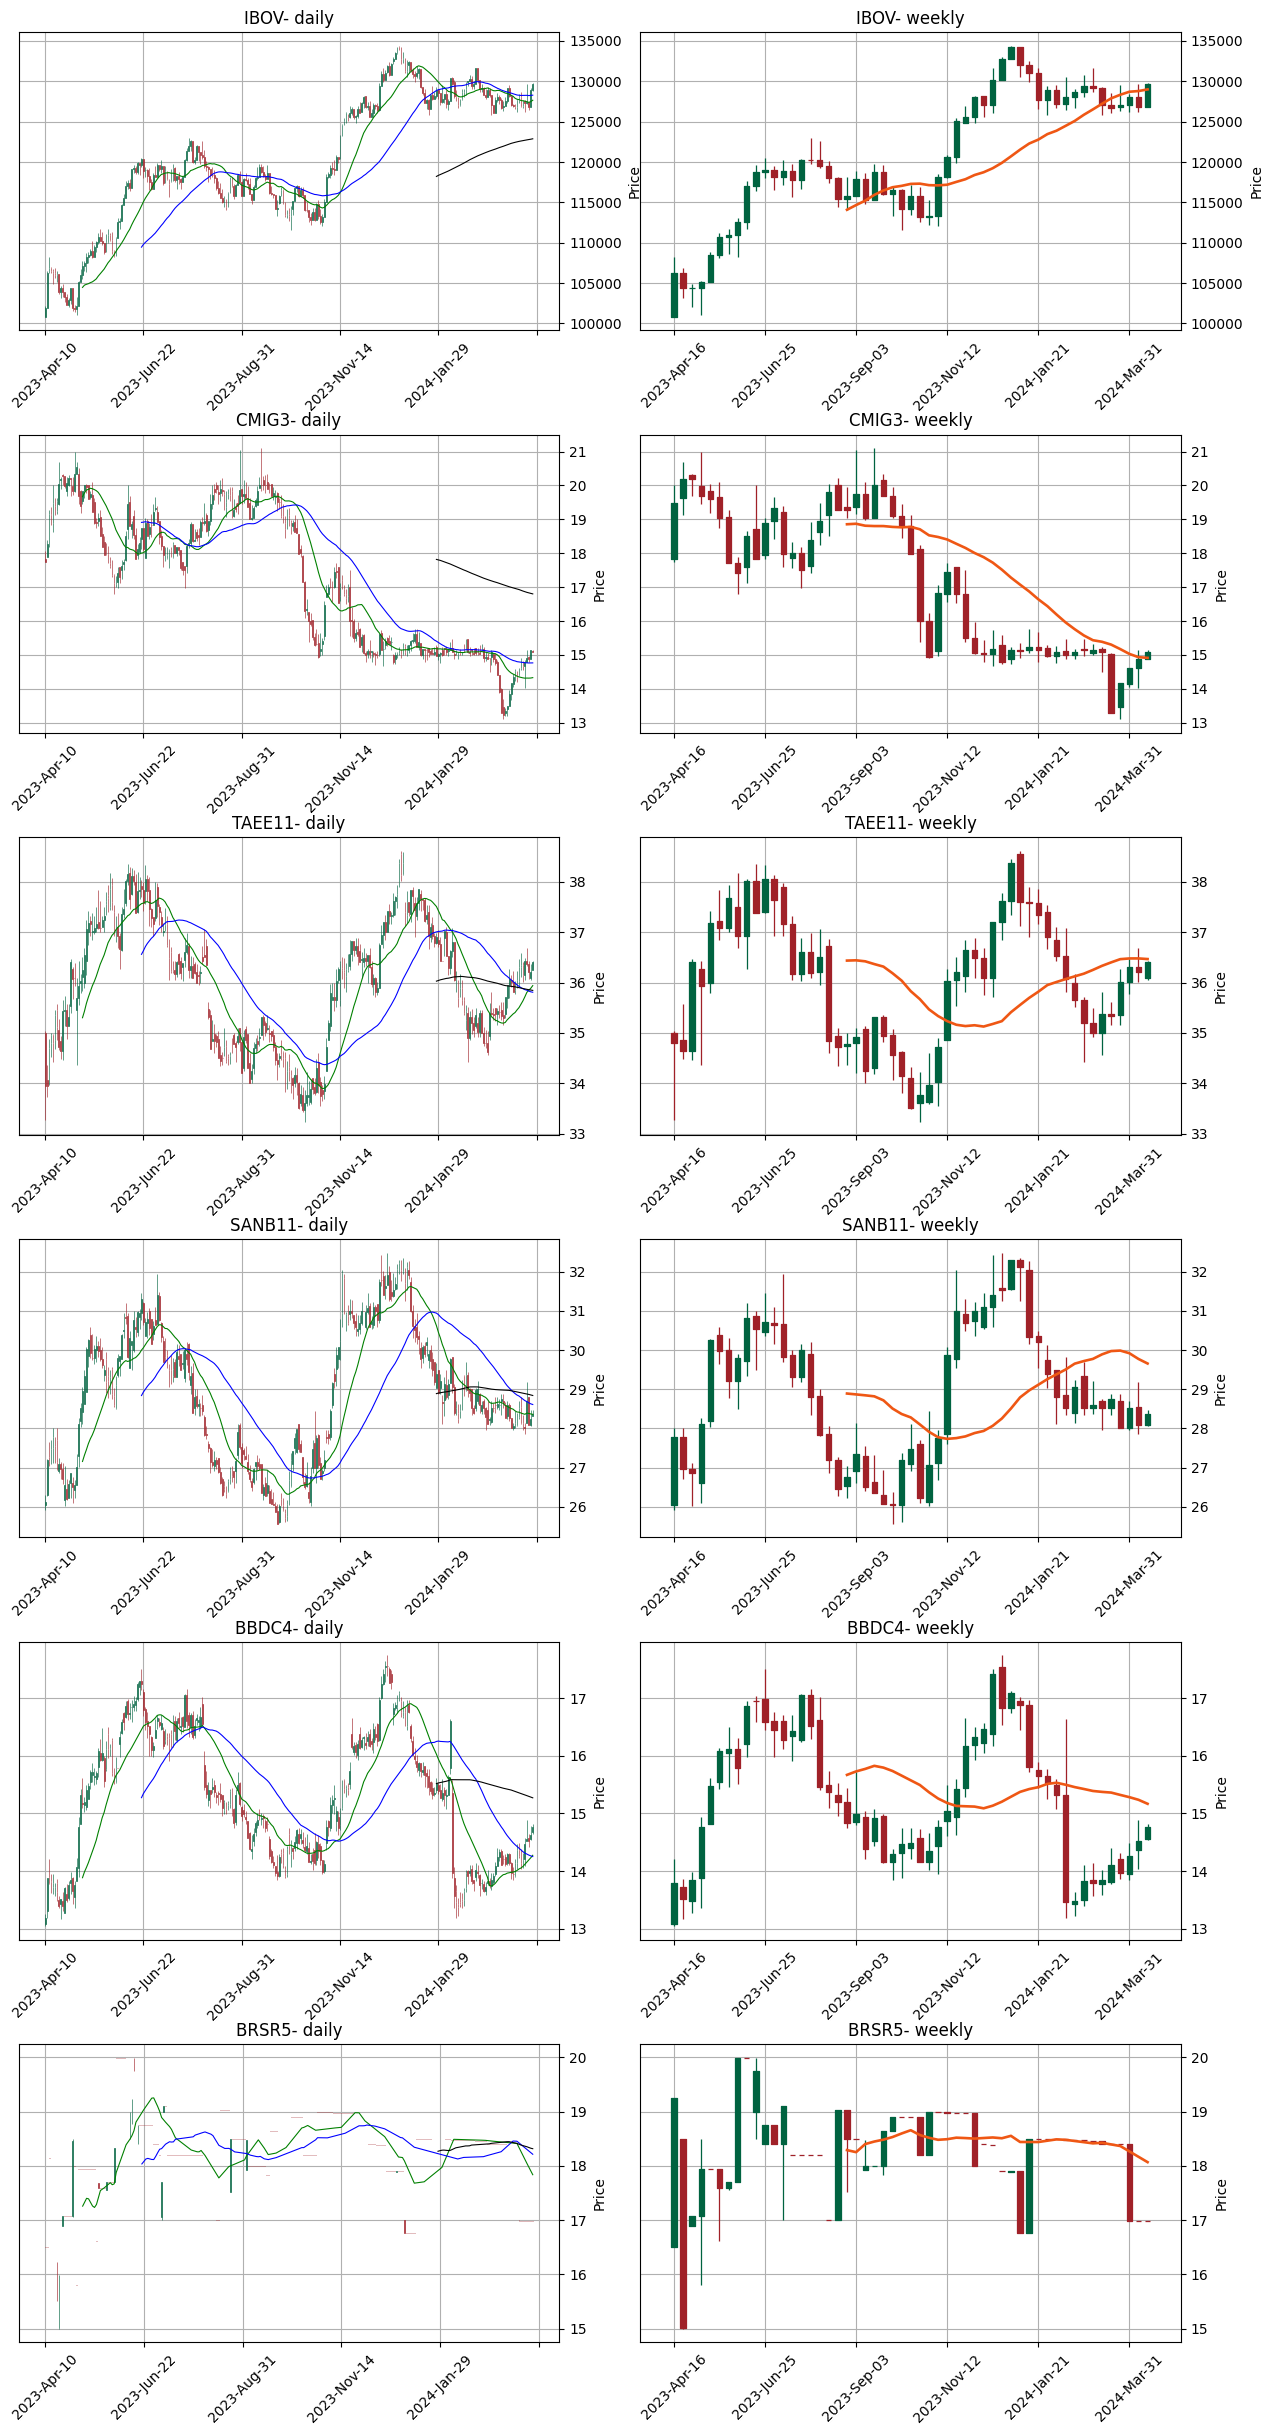

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=len(tickers_empresas_filtradas), figsize=(15,30))

plt.subplots_adjust(hspace=0.35, wspace=0.15)

contador = 0
for k, v in cotacoes_empresas_filtradas.items():
    mpf.plot(v[0], ax=ax[contador,0], type='candle', style='charles', volume=False, mav=(20, 50, 200), mavcolors=['green','blue','black'])
    ax[contador,0].set_title(k + '- daily')
    ax[contador,0].grid(True)

    mpf.plot(v[1], ax=ax[contador,1], type='candle', style='charles', volume=False, mav=(20))
    ax[contador,1].set_title(k + '- weekly')
    ax[contador,1].grid(True)

    contador += 1
    
plt.savefig('graficos.png')

plt.show()

In [24]:
# Acrescentar indicadores qualitativos para calculo do score (ROE e razao dívida)
# Por último, criar outro código para vizualização dos preços e indicadores